# 03: Load the combined dataframe, and do some plotting 

Weil ich es sonst nicht verstehe mit den P-Vales:

The p-value is the probability of observing a non-zero correlation coefficient in our sample data when in fact the null hypothesis is true. A low p-value would lead you to reject the null hypothesis (the null hypothesis is typically that the observed relationship between the variables is the result of pure chance (i.e. the correlation coefficient is really zero — there is no linear relationship)).

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats

# change the font for the whole plot
plt.rcParams["font.family"] = "Times New Roman"

# Read in the data
df = pd.read_csv("processed_data/sales_and_weather_2021-2022.csv")
df_cold = pd.read_csv("processed_data/sales_and_weather_2021-2022_ONLY_COLD.csv")
df_warm = pd.read_csv("processed_data/sales_and_weather_2021-2022_ONLY_WARM.csv")
# Drop the null values from the variables
df = df.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df_cold = df_cold.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df_warm = df_warm.dropna(subset=["temperature_mean", "temperature_min", "temperature_max", "precipitation"])
df


,date,day_of_week,month,year,week_of_year,Getränke_sales,Coffee_sales,Cappuccino_sales,Flat White_sales,Cappuccino groß_sales,...,precipitation,temperature_mean,temperature_max,temperature_min,sunshine_duration,cloud_cover,wind_speed,humidity,pressure,snow_depth
0,2021-01-02,Saturday,January,2021,53,692.9,596.4,230.4,98.8,72.2,...,0.8,0.0,1.0,-1.6,0.0,8.0,2.2,89.0,1012.7,0.0
1,2021-01-04,Monday,January,2021,1,429.2,371.9,192.0,38.0,30.4,...,0.0,0.0,0.9,-0.9,0.0,8.0,2.1,89.0,1013.4,0.0
2,2021-01-05,Tuesday,January,2021,1,392.8,378.0,144.0,41.8,22.8,...,1.0,0.5,1.1,-0.4,0.0,8.0,2.2,92.0,1012.5,0.0
3,2021-01-07,Thursday,January,2021,1,493.2,414.2,179.2,34.2,53.2,...,0.1,0.3,1.3,-1.0,0.0,8.0,1.5,89.0,1015.3,3.0
4,2021-01-08,Friday,January,2021,1,557.5,483.5,185.6,102.6,72.2,...,0.0,0.0,1.1,-1.9,0.1,7.0,2.0,84.0,1016.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2022-09-26,Monday,September,2022,39,882.0,799.4,190.4,57.0,58.8,...,3.3,11.3,15.9,6.7,3.6,NaN,2.8,78.0,1008.2,NaN
606,2022-09-27,Tuesday,September,2022,39,817.1,742.0,136.0,68.4,54.6,...,5.9,9.4,12.5,6.8,2.7,NaN,4.3,81.0,1001.2,NaN
607,2022-09-28,Wednesday,September,2022,39,847.2,778.6,142.8,68.4,58.8,...,1.0,9.3,12.0,5.6,0.4,NaN,2.6,83.0,999.5,NaN
608,2022-09-29,Thursday,September,2022,39,954.0,882.9,163.2,68.4,79.8,...,0.0,9.0,13.5,4.4,1.1,NaN,1.0,81.0,1003.0,NaN


## 1. plot general Correlations

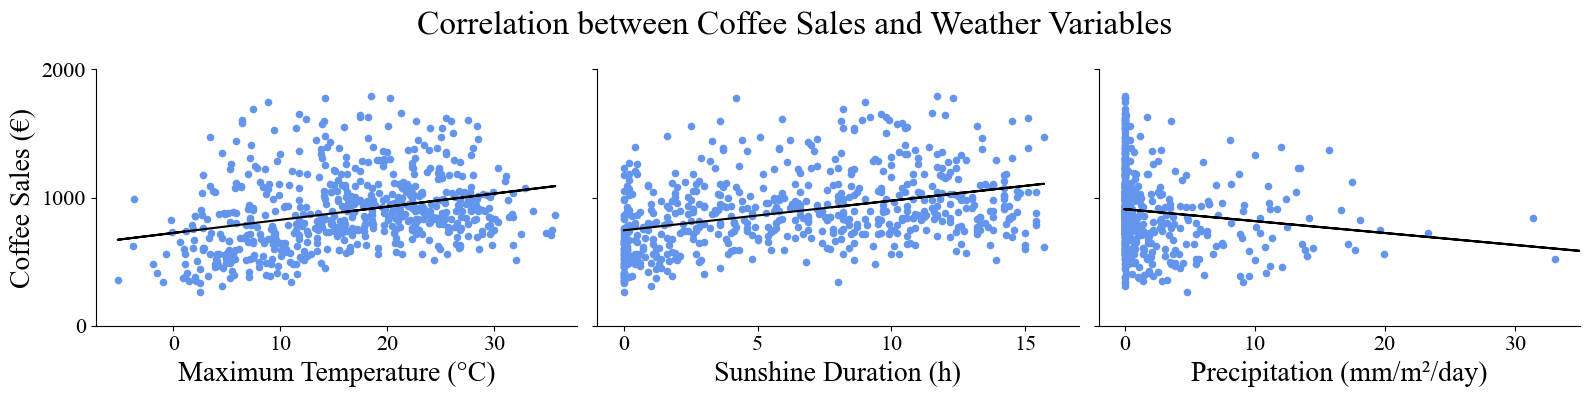

In [135]:
sales_variable = "Coffee_sales"

# plot the correlation between sales and mean, min and max temperature
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)

color = "cornflowerblue"

weather_variable_1 = "temperature_max"
axes[0].scatter(df[weather_variable_1], df[sales_variable], s=20,  marker="o", color=color)
axes[0].set_xlabel("Maximum Temperature (°C)", fontsize=20)
axes[0].set_ylabel("Coffee Sales (€)", fontsize=20,)
axes[0].set_ylim(0, 1800)
axes[0].set_yticks(np.arange(0, 2500, 1000))
# fit a linear regression line with sklearn to plot the line in the plot
from sklearn.linear_model import LinearRegression
X = df[weather_variable_1].values.reshape(-1, 1)
y = df[sales_variable].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[0].plot(X, reg.predict(X), color="black")
# corr = df[sales_variable].corr(df["temperature_mean"]) # inbuilt function to calculate correlation???
corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_1])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_1])[1]
#axes[0].set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval.round(2)}")


weather_variable_2 = "sunshine_duration"
axes[1].scatter(df[weather_variable_2], df[sales_variable], s=20,  marker="o", color=color)
axes[1].set_xlabel("Sunshine Duration (h)", fontsize=20)
axes[1].set_xlim(-1, 17)
axes[1].set_xticks(np.arange(0, 20, 5))
X = df[weather_variable_2].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[1].plot(X, reg.predict(X), color="black")
#corr = df[sales_variable].corr(df["temperature_min"])
corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_2])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_2])[1]
#axes[1].set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval.round(2)}")


weather_variable_3 = "precipitation"
axes[2].scatter(df[weather_variable_3], df[sales_variable], s=20,  marker="o", color=color)
axes[2].set_xlabel("Precipitation (mm/m²/day)", fontsize=20)
axes[2].set_xlim(-2, 35)
axes[2].set_xticks(np.arange(0, 40, 10))
X = df[weather_variable_3].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
axes[2].plot(X, reg.predict(X), color="black")
#corr = df[sales_variable].corr(df["temperature_max"])
corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_3])[0]
pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable_3])[1]
#axes[2].set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval.round(2)}")

for ax in axes:
    ax.tick_params(axis="both", which="major", labelsize=16)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

# set titel for the whole plot
fig.suptitle("Correlation between Coffee Sales and Weather Variables", fontsize=24)
plt.tight_layout()
plt.savefig("results/temp_sun_precip.pdf", bbox_inches="tight", dpi=300)
plt.show()



In [138]:
def plot_correlation(df, weather_variable, sales_variable, condition, condition_value, ax, s, marker, color=None):
    df= df[df[condition] == condition_value]
    ax.scatter(df[weather_variable], df[sales_variable], color=color, s=s, marker=marker)
    X = df[weather_variable].values.reshape(-1, 1)
    y = df[sales_variable].values.reshape(-1, 1)
    reg = LinearRegression().fit(X, y)
    ax.plot(X, reg.predict(X), color="black")
    corr = scipy.stats.pearsonr(df[sales_variable], df[weather_variable])[0]
    pval = scipy.stats.pearsonr(df[sales_variable], df[weather_variable])[1]
    #ax.set_title(f"{condition_value},\n Corr={corr.round(2)}, PVal={pval.round(3)}", fontsize=16)
    ax.set_title(f"{condition_value}", fontsize=18, alpha=0.0)

# 2. plot the per day mean 

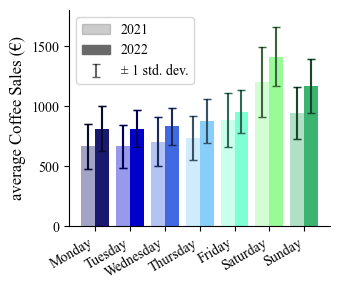

In [136]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_colors = ["midnightblue", "mediumblue", "royalblue", "lightskyblue", "aquamarine", "palegreen", "mediumseagreen"]


fig, ax = plt.subplots(1, 1, figsize=(3.5, 3), sharey=True, sharex=True)
ax.set_ylabel("average Coffee Sales (€)", fontsize=12, x=-0.0, y=0.5)

width = 0.4
for i, day in enumerate(days):
    ax.bar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width, alpha=0.4, )
    ax.bar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), label=day, color=day_colors[i], width=width)
    # add the standard deviation as error bars
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color=day_colors[i], capsize=3)
    ax.errorbar(i+1-0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2021)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6, label = "2021")
    ax.errorbar(i+1+0.5*width, df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").mean(), yerr=df[(df["day_of_week"] == day) & (df["year"] == 2022)][sales_variable].astype("float").std(), fmt="none", color="black", capsize=3, alpha=0.6)
    #ax[int(year) - 2021].set_ylim(0, 1600)
    # turn the x-axis labels 45 degrees
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_horizontalalignment("right")
    # use the day names as x-axis labels
    ax.set_xticks(np.arange(1, 8))
    ax.set_xticklabels(days)
    
    ax.set_ylim(0, 1800)
    ax.set_yticks(np.arange(0, 1600, 500))

    
    
    
t = ["2021", "2022", "± 1 std. dev."]
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles[:3], t)
leg.legendHandles[0].set_color('grey')
leg.legendHandles[1].set_color('dimgrey')
# remove the right and top border of the fig
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig("results/mean_sales_by_day_of_week.pdf", dpi=300, format="pdf")
plt.show()


## 3. plot the per day Correlation for Temperatur Max

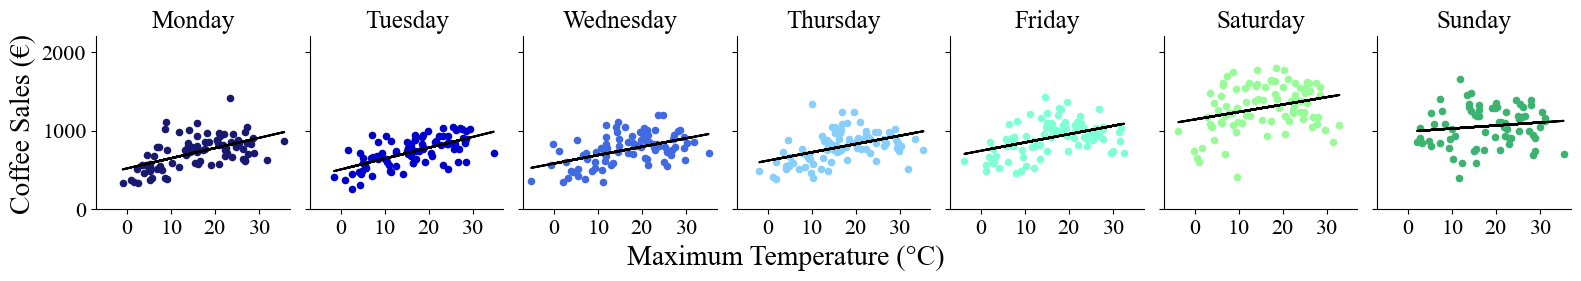

In [137]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximum Temperature (°C)", fontsize=20, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)",        fontsize=20, x=0.015, y=0.57)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 1000))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    # set the font size of the x and y axis labels
    axes[i].tick_params(axis="both", which="major", labelsize=16)
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels
plt.tight_layout()
plt.savefig("results/correlation_by_day_of_week.pdf", dpi=300, bbox_inches="tight")
plt.show()







## 3. plot the per day Correlation for Sunshine Hours

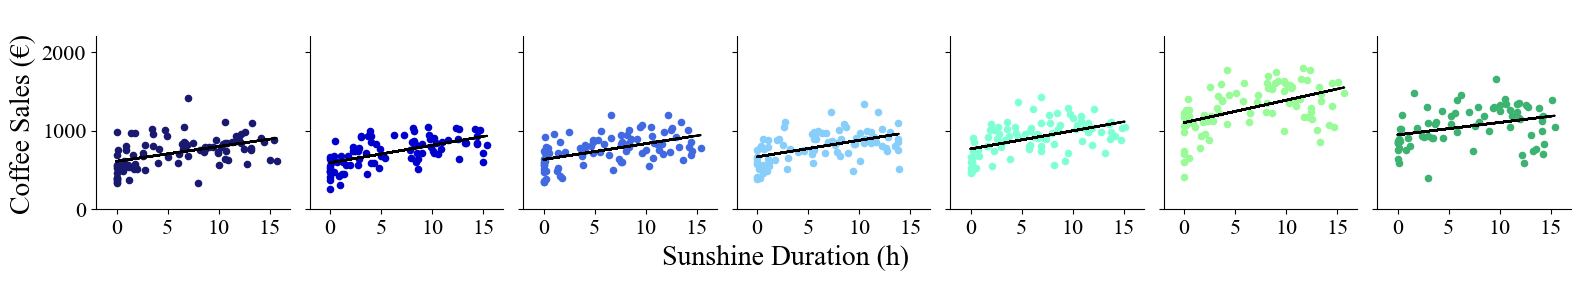

In [139]:
weather_variable = "sunshine_duration"

sales_variable = "Coffee_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Sunshine Duration (h)", fontsize=20, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)",      fontsize=20, x=0.015, y=0.57)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 1000))
    axes[i].set_xlim(-2, 17)
    axes[i].set_xticks(np.arange(0, 20, 5))
    axes[i].tick_params(axis="both", which="major", labelsize=16)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.savefig("results/correlation_sunshine_by_day_of_week.pdf", dpi=300, bbox_inches="tight")
plt.show()

## 3. plot the per day Correlation for Precipitation

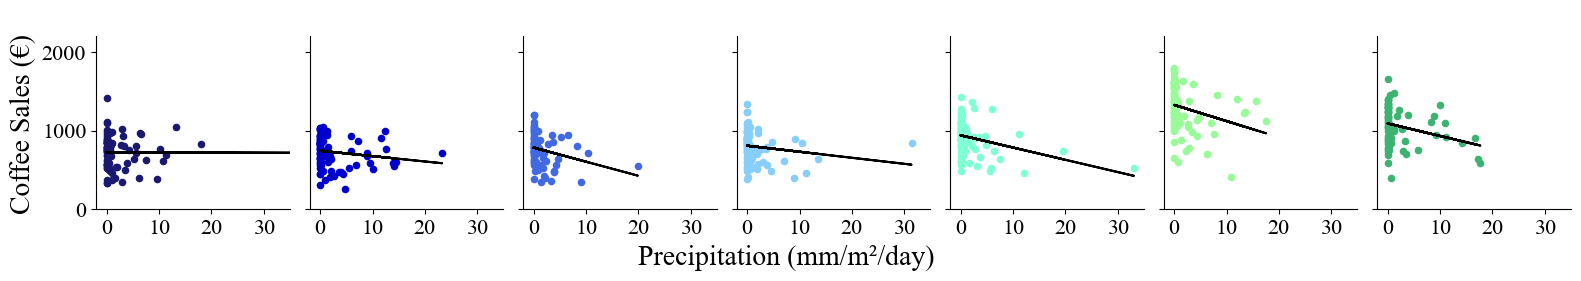

In [140]:
weather_variable = "precipitation"

sales_variable = "Coffee_sales"


# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Precipitation (mm/m²/day)", fontsize=20, x=0.5, y=0.08)
fig.supylabel("Coffee Sales (€)",   fontsize=20, x=0.015, y=0.57)
for i, day in enumerate(days):
    plot_correlation(df, weather_variable, sales_variable, "day_of_week", day, axes[i], 20, "o", day_colors[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 1000))
    axes[i].set_xlim(-2, 35)
    axes[i].set_xticks(np.arange(0, 40, 10))
    axes[i].tick_params(axis="both", which="major", labelsize=16)
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.savefig("results/correlation_precipitation_by_day_of_week.pdf", dpi=300, bbox_inches="tight")
plt.show()

## 4. plot the whole date range

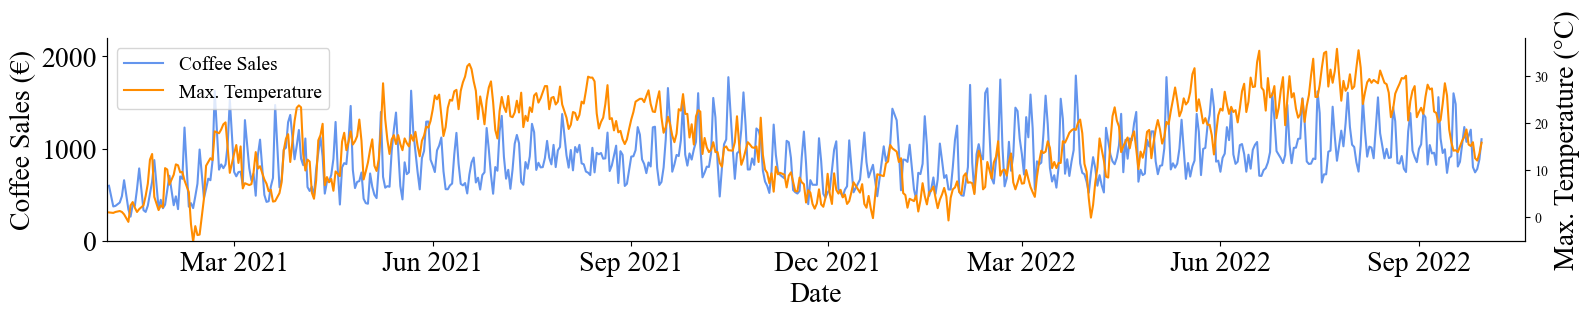

In [160]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(16, 3))

# add a vline where the day of the week is Saturday
#ax.vlines(df[df["day_of_week"] == "Saturday"]["date"].astype("datetime64"), 0, 2000, colors='lightgrey')

lns1 = ax.plot(df["date"].astype("datetime64"), df["Coffee_sales"].astype("float"), color="cornflowerblue", label="Coffee Sales")
# plot the temperature on the same axis,  but with a different y-axis
ax2 = ax.twinx()
lns2 = ax2.plot(df["date"].astype("datetime64"), df["temperature_max"].astype("float"), color="darkorange", label="Max. Temperature")
ax.set_ylim(0, 2200)
ax.set_yticks(np.arange(0, 2500, 1000))
ax2.set_ylim(-5, 38)
ax2.set_yticks(np.arange(0, 40, 10))
ax.set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2022-10-20'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3, ))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate()
ax.tick_params(axis="both", which="major", labelsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Coffee Sales (€)", fontsize=20)
ax2.set_ylabel("Max. Temperature (°C)", fontsize=20)

ax.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
# plot the legend combined for both axes
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="upper left", fontsize=14)



plt.tight_layout()
plt.savefig("results/coffee_sales.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# plot the correlation between Coffee_sales and Getränke_sales
fig, ax = plt.subplots(1, 1, figsize=(5.5,5))

ax.scatter(df["Coffee_sales"], df["Getränke_sales"])
ax.set_xlabel("Coffee Sales")
ax.set_ylabel("Getränke Sales")
X = df["Coffee_sales"].values.reshape(-1, 1)
y = df["Getränke_sales"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
ax.plot(X, reg.predict(X), color="red")
x_ix_y = np.linspace(0, 2000, 2000)
ax.plot(x_ix_y, x_ix_y, color="black")
#corr = df["Coffee_sales"].corr(df["Getränke_sales"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["Getränke_sales"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["Getränke_sales"])[1]
ax.set_title(f"Correlation = {corr.round(2)}" + f",   P-Value = {pval}")
plt.show()

In [ ]:
day_colors_warm = ["darkred", "red", "tomato", "darkorange", "orange", "goldenrod", "gold",  ]
day_colors_cold = ["darkblue", "mediumblue", "blue", "lightskyblue", "turquoise", "aquamarine", "palegreen", ]

sales_variable = "Coffee_sales"
weather_variable = "temperature_max"

# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df_warm, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors_warm[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()

# Plot the correlation between the max temperature and the sales for each day of the week
fig, axes = plt.subplots(1, 7, figsize=(16, 3), sharey=True, sharex=True, frameon=True)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08) 
fig.supylabel("Coffee Sales (€)", fontsize=12, x=0.02, y=0.6)
for i, day in enumerate(days):
    plot_correlation(df_cold, weather_variable, sales_variable, "day_of_week", day, axes[i], day_colors_cold[i])
    axes[i].set_ylim(-80, 1100)
    axes[i].set_yticks(np.arange(0, 1100, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
# tight layout to avoid overlapping of the x-axis labels

plt.tight_layout()
plt.show()


In [ ]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(14, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-7, 37)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()



In [ ]:
weather_variable = "sunshine_duration"

sales_variable = "Coffee_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(14, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Sunshine Duration (h)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 17)
    axes[j,i].set_xticks(np.arange(0, 20, 5))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
weather_variable = "precipitation"

sales_variable = "Coffee_sales"
# Plot the correlation between the max temperature and the sales for each month of the year
fig, axes = plt.subplots(2, 6, figsize=(14, 5), sharey=True, sharex=True)

fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Precipitation (mm)", fontsize=12, x=0.5, y=0.05)
for i, month in enumerate(df["month"].unique()):
    j = 1 if i >= 6 else 0
    i = i - 6 if i >= 6 else i
    plot_correlation(df, weather_variable, sales_variable, "month", month, axes[j, i])
    axes[j,i].set_ylim(0, 2200)
    axes[j,i].set_yticks(np.arange(0, 2500, 500))
    axes[j,i].set_xlim(-2, 35)
    axes[j,i].set_xticks(np.arange(0, 40, 10))
    
    axes[j, i].spines["right"].set_visible(False)
    axes[j, i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
weather_variable = "temperature_max"

sales_variable = "Coffee_sales"

# Plot the correlation between the max temperature and the sales for each year
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5), sharey=True, sharex=True, frameon=True)
fig.supylabel("Getränke Sales (€)", fontsize=12, x=0.02, y=0.6)
fig.supxlabel("Maximal Temperature (°C)", fontsize=12, x=0.5, y=0.08)
for i, year in enumerate(df["year"].unique()):
    plot_correlation(df, weather_variable, sales_variable, "year", year, axes[i])
    axes[i].set_ylim(0, 2200)
    axes[i].set_yticks(np.arange(0, 2500, 500))
    axes[i].set_xlim(-7, 37)
    axes[i].set_xticks(np.arange(0, 40, 10))
    
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 1.5))
plt.plot(df['date'], df["Coffee_sales"].astype("float"))
plt.xticks(rotation='vertical')

In [ ]:
# print the day where the sales were the highest
print("The day with the highest sales was {}".format(df["date"][df["Getränke_sales"].idxmax()]))
# which weekday was this?
print("This was a {}".format(df["day_of_week"][df["Getränke_sales"].idxmax()]))

In [ ]:
# plot the correlation between sales and precipitation
plt.scatter(df["precipitation"], df["Getränke_sales"])
plt.xlabel("Precipitation")
plt.ylabel("Sales")
X = df["precipitation"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y))) # diffent way to calculate correlation???
plt.show()

In [ ]:
# plot the correlation between sales and sunshine
plt.scatter(df["sunshine_duration"], df["Getränke_sales"])
plt.xlabel("Sunshine Duration")
plt.ylabel("Sales")
X = df["sunshine_duration"].values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color="red")
plt.title("R^2 = {}".format(reg.score(X, y)))
plt.show()

In [ ]:
# calculate the correlation between sales and mean temperature

#corr = df["Getränke_sales"].corr(df["temperature_mean"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_mean"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_mean"])[1]
print("Correlation between sales and mean temperature: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.2f}".format(pval))

#corr = df["Getränke_sales"].corr(df["temperature_min"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_min"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_min"])[1]
print("Correlation between sales and min temperature: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.2f}".format(pval))

#corr = df["Getränke_sales"].corr(df["temperature_max"])
corr = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_max"])[0]
pval = scipy.stats.pearsonr(df["Coffee_sales"], df["temperature_max"])[1]
print("Correlation between sales and max temperature: {:.2f}".format(corr) + ". The correlation has a p-value of: {:.2f}".format(pval))

# 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

actual = np.array([[7,6],
                   [3,3],
                   [9,11],
                   [6,5],
                    [0,0],
])
#prediction = np.array([[6.37, 6.59],
#                   [3.16, 2.87],
#                   [9.68, 10.42],
#                   [5.43, 5.49],
#                    [0.39, -0.33],
#])
#print(actual - prediction)
#print((actual - prediction) ** 2)

# center the data
actual_centered = actual - np.mean(actual, axis=0)
print(actual_centered)

# calculate the scatter matrix
scatter_matrix = np.dot(actual_centered.T, actual_centered)
print(scatter_matrix)

# calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(scatter_matrix)
print(eigenvalues)
print(eigenvectors)

# sort the eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
print(eigenvalues)
print(eigenvectors)

# check the norm of the eigenvectors
print(np.linalg.norm(eigenvectors[:,0]))
print(np.linalg.norm(eigenvectors[:,1]))

# calculate the emmbedding
embedding = np.dot(actual_centered, eigenvectors)
print(embedding)

# calculate the emmbedding with only one eigenvector
embedding = np.dot(actual_centered, eigenvectors[:,0].reshape(-1,1))
print(embedding)

# backtransform the embedding
backtransformed = np.dot(embedding, eigenvectors[:,0].reshape(1,-1))
print(backtransformed)

# calculate mean squared error
mse = np.mean((actual - backtransformed) ** 2)
print(mse)

# import PCA
from sklearn.decomposition import PCA
print("------")
# create a PCA instance
pca = PCA(n_components=1)

# fit the PCA instance to the data
pca.fit(actual)

# print the eigenvalues

print(pca.singular_values_ ** 2)




# transform the data
embedding = pca.transform(actual)
print(embedding)

# backtransform the data
backtransformed = pca.inverse_transform(embedding)
print(backtransformed)

# calculate mean squared error
mse = np.mean((actual - backtransformed) ** 2)
print(mse)

# calculate the L2 loss
def L2_loss(actual, prediction):
    return np.sum((actual - prediction) ** 2)

print(L2_loss(actual, backtransformed))
